In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pepsi-projesi/testtrain.csv
/kaggle/input/pepsi-projesi/samplesub.csv


In [2]:
data = pd.read_csv('/kaggle/input/pepsi-projesi/testtrain.csv')

In [3]:
data.head()

,ID,Months,KG_N,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE
0,1104,2017_Ağustos,0.767244,1.252642,1.214838,1.215157,1.384924,0.000000,1.663801,0.593598
1,1075,2017_Ağustos,0.567527,0.472860,0.444116,0.578143,1.092074,6.441386,0.380396,0.000000
2,1222,2017_Ağustos,2.146795,0.445412,0.511511,0.493610,0.525460,0.211591,0.619338,0.219533
3,1153,2017_Ağustos,0.811281,1.895182,1.633033,1.645367,1.474986,0.350339,1.486028,2.501944
4,1119,2017_Ağustos,0.828340,2.371785,2.063324,2.315591,1.770818,0.000000,1.742556,3.728387


In [4]:
data.tail()

,ID,Months,KG_N,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE
15495,1007,2019_Temmuz,0.917332,0.504051,0.532248,0.544934,0.639379,0.000000,0.738617,0.263685
15496,1370,2019_Temmuz,0.893760,1.235175,1.411839,1.476302,1.485722,4.113885,1.339222,0.719922
15497,1403,2019_Temmuz,0.860005,0.975663,1.529348,1.524607,1.916349,0.000000,1.649273,1.934101
15498,1097,2019_Temmuz,1.724277,1.177783,1.069680,1.064206,0.968016,1.047549,1.190887,0.580108
15499,1453,2019_Temmuz,1.318582,1.255137,1.356540,1.346484,1.552523,1.283421,0.868984,3.241489


We need to take `Months` as in any order. So, let us order the data set according to `Months`

In [5]:
#data.sort_values(['ID'], axis=0, ascending=True, inplace=True) 
months = ['2017_Ocak', '2017_Şubat', '2017_Mart', '2017_Nisan', '2017_Mayıs', '2017_Haziran', 
          '2017_Temmuz', '2017_Ağustos', '2017_Eylül', '2017_Ekim', '2017_Kasım', '2017_Aralık',
         '2018_Ocak', '2018_Şubat', '2018_Mart', '2018_Nisan', '2018_Mayıs', '2018_Haziran', 
          '2018_Temmuz', '2018_Ağustos', '2018_Eylül', '2018_Ekim', '2018_Kasım', '2018_Aralık',
         '2019_Ocak', '2019_Şubat', '2019_Mart', '2019_Nisan', '2019_Mayıs', '2019_Haziran', 
          '2019_Temmuz']


data['Months'] = pd.Categorical(data['Months'], months)

In [6]:
data['Months']

0        2017_Ağustos
1        2017_Ağustos
2        2017_Ağustos
3        2017_Ağustos
4        2017_Ağustos
             ...     
15495     2019_Temmuz
15496     2019_Temmuz
15497     2019_Temmuz
15498     2019_Temmuz
15499     2019_Temmuz
Name: Months, Length: 15500, dtype: category
Categories (31, object): [2017_Ocak, 2017_Şubat, 2017_Mart, 2017_Nisan, ..., 2019_Nisan, 2019_Mayıs, 2019_Haziran, 2019_Temmuz]

In [7]:
data = data.sort_values('Months')

In [8]:
data.head()

,ID,Months,KG_N,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE
4999,1453,2017_Ocak,0.961883,1.255137,1.356540,1.346484,1.552523,1.283421,0.868984,3.241489
4842,1447,2017_Ocak,0.049575,0.950710,0.698143,0.786455,0.484902,0.000000,0.134190,2.634400
4841,1257,2017_Ocak,0.800829,0.276979,0.437203,0.517762,0.705584,3.028180,0.431242,0.000000
4840,1225,2017_Ocak,1.215752,0.046163,0.060483,0.076985,0.131812,0.901863,0.031349,0.000000
4839,1273,2017_Ocak,0.881055,0.056144,0.119237,0.098118,0.095430,0.000000,0.069580,0.193778


In [9]:
data.tail()

,ID,Months,KG_N,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE
15158,1313,2019_Temmuz,0.975951,2.888313,2.835774,2.454466,2.262878,0.000000,3.225908,1.149177
15157,1034,2019_Temmuz,0.117278,0.114784,0.129606,0.119251,0.126444,0.544587,0.105517,0.030661
15156,1306,2019_Temmuz,1.059414,0.514032,0.558169,0.726075,1.131439,2.698653,0.785259,0.343404
15169,1394,2019_Temmuz,0.793912,0.646283,0.606555,0.594748,0.595840,0.000000,0.579960,0.916153
15499,1453,2019_Temmuz,1.318582,1.255137,1.356540,1.346484,1.552523,1.283421,0.868984,3.241489


The feature of `Months` is encoded based on label. 

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['Months'] = le.fit_transform(data.Months.values)

In [11]:
#train_data = data.iloc[:-2500, :]
#test_data = data.iloc[-2500:, :]

In [12]:
#train_data.shape

In [13]:
#train_data.tail()

In [14]:
#train_data['Months'] += 1
#test_data['Months'] += 1

In [15]:
#sample_train = train_data[train_data['ID'] == '1000']
#sample_train = train_data.loc[train_data['ID'] == 1000]
#sample_test = test_data.loc[test_data['ID'] == 1000]
#sample_data = data.loc[data['ID'] == 1000]

We try to construct sequential data sets based on time for each consumer. The features except `KG_N` have same values for one consumer. So, we got only one row for each user. However, `KG_N` feature has different values in every month. So, `KG_N` has sequential data based on time. Therefore, we will use data of the `KG_N` feature in one row for one consumer. We shall get `KG_N` values for one consumer, then create one column for one monthly `KG_N` value.  

In [16]:
#create target
target = []

#create data frame for features
features = pd.DataFrame()

for consumer_id in range(1000, 1500):
    #take one sample data for one consumer
    sample_data = data.loc[data['ID'] == consumer_id]
    
    #take feature of KG_N
    temp_column = sample_data['KG_N']
    sample_data = sample_data.drop(['KG_N'], axis = 1)
    
    #we can take first row, because others are same
    sample_data = sample_data.head(1)
    
    #the data of KG_N 
    sale_list = list(temp_column)
    #sample_test = test_data.loc[test_data['ID'] == consumer_id]
    
    #data of last 5 months is ready for target value. Because, we try to forecast 
    # sale(KG_N) data for future 5 months 
    
    for sale_index in range(0,len(sale_list[:-5])):
        sample_data['KG_N' + str(sale_index+1)] = sale_list[sale_index]
    
    #target list is ready 
    sample_target = sale_list[-5:]
    target.append(sample_target)
    
    #we create a new data frame. After processing of one consumer, we add this to data frame  
    features = features.append(sample_data)
    
        

In [17]:
features.head()

,ID,Months,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE,KG_N1,...,KG_N17,KG_N18,KG_N19,KG_N20,KG_N21,KG_N22,KG_N23,KG_N24,KG_N25,KG_N26
4703,1000,9,1.135363,1.487874,1.610649,1.943785,0.0,2.010936,1.027759,0.838420,...,0.993866,0.269208,0.000000,0.244104,0.225719,1.270895,0.876907,1.092460,0.913969,0.595763
4508,1001,9,1.407351,1.743629,1.864247,2.255124,0.0,2.433767,0.965211,0.629077,...,1.047801,0.000000,0.300051,1.275315,0.865830,0.674250,0.974255,1.001949,0.879498,0.870328
4652,1002,9,1.353702,1.679691,1.809904,2.182359,0.0,2.356923,0.919832,0.000000,...,0.962731,0.809239,1.597027,0.622993,0.523961,0.000000,1.201331,0.948026,0.875313,0.867262
4593,1003,9,1.189012,1.368637,1.340446,1.602623,0.0,1.603778,1.380975,1.942177,...,0.725677,1.057338,1.009389,1.153974,1.360827,1.220480,1.023983,0.961195,1.057607,0.432472
4943,1004,9,1.493439,1.750542,1.843113,2.188323,0.0,2.456323,0.827849,1.212114,...,0.909427,0.750613,1.311159,1.587534,1.223260,1.056295,1.283058,0.931790,1.106693,1.525527


In [18]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range = (0, 1))

#features['Age_0btw14'] = scaler.fit_transform(features['Age_0btw14'])

In [19]:
features.tail()

,ID,Months,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE,KG_N1,...,KG_N17,KG_N18,KG_N19,KG_N20,KG_N21,KG_N22,KG_N23,KG_N24,KG_N25,KG_N26
4678,1495,9,0.981902,0.784547,0.846836,0.775367,0.000000,1.081929,0.334819,0.000000,...,1.244279,1.266389,1.044007,0.987653,1.037840,0.913910,0.542642,0.812121,0.524834,0.887420
4627,1496,9,2.210838,1.995929,1.784243,1.535226,0.000000,2.044196,1.639754,0.000000,...,0.613353,0.480915,0.843119,1.742318,0.495263,1.824678,1.275957,1.534073,0.363101,0.537201
4655,1497,9,0.394258,0.400914,0.484553,0.713337,2.539092,0.422067,0.283308,0.000000,...,0.819996,1.034904,1.153090,1.054918,0.896917,1.475815,0.805502,1.327692,0.630186,1.092682
4915,1498,9,0.798497,0.689503,0.582671,0.452695,0.000000,0.167068,2.143823,0.000000,...,0.415617,1.555607,2.149390,1.719520,1.238800,1.210753,0.924875,1.083562,0.943477,1.037118
4698,1499,9,0.853393,0.929705,0.920802,0.941772,0.000000,1.162214,0.456237,0.446737,...,0.618785,2.033133,0.913440,1.526766,1.220182,0.508102,0.840249,0.549556,0.436457,0.594004


The features of `Months` and `ID` are of no use, anymore.  

In [20]:
features = features.drop(['Months', 'ID'], axis = 1)
features.head()

,Age_0btw14,Age_15btw24,Age_25btw34,Age_35_plus,SES_AB,SES_C,SES_DE,KG_N1,KG_N2,KG_N3,...,KG_N17,KG_N18,KG_N19,KG_N20,KG_N21,KG_N22,KG_N23,KG_N24,KG_N25,KG_N26
4703,1.135363,1.487874,1.610649,1.943785,0.0,2.010936,1.027759,0.838420,0.975015,0.000000,...,0.993866,0.269208,0.000000,0.244104,0.225719,1.270895,0.876907,1.092460,0.913969,0.595763
4508,1.407351,1.743629,1.864247,2.255124,0.0,2.433767,0.965211,0.629077,0.911534,0.884192,...,1.047801,0.000000,0.300051,1.275315,0.865830,0.674250,0.974255,1.001949,0.879498,0.870328
4652,1.353702,1.679691,1.809904,2.182359,0.0,2.356923,0.919832,0.000000,1.645973,0.926581,...,0.962731,0.809239,1.597027,0.622993,0.523961,0.000000,1.201331,0.948026,0.875313,0.867262
4593,1.189012,1.368637,1.340446,1.602623,0.0,1.603778,1.380975,1.942177,1.513418,0.362346,...,0.725677,1.057338,1.009389,1.153974,1.360827,1.220480,1.023983,0.961195,1.057607,0.432472
4943,1.493439,1.750542,1.843113,2.188323,0.0,2.456323,0.827849,1.212114,0.876699,0.852420,...,0.909427,0.750613,1.311159,1.587534,1.223260,1.056295,1.283058,0.931790,1.106693,1.525527


In [21]:
#train_target = sample_train['KG_N']
#train_features = sample_train.drop(['KG_N'], axis = 1)

#sample_features = sample_data.drop(['Age_0btw14', 'Age_15btw24', 'Age_25btw34', 
#                                    'Age_35_plus', 'SES_AB','SES_C', 'SES_DE'], axis = 1)

#features = sample_features.iloc[:-5]
#target = sample_features.iloc[-5:]

#test_target = sample_test['KG_N']
#test_features = sample_test.drop(['KG_N'], axis = 1)

#train_target = train_data['KG_N']
#train_features = train_data.drop(['KG_N'], axis = 1)


In [22]:
features.shape

(500, 33)

We must convert the list(target) to array. 

In [23]:
target = np.array(target)
target.shape

(500, 5)

In [24]:
#target = target['KG_N']

We must expand dimension of fetures for implementing in Recurrent Neural Network.

In [25]:
#train_features = np.expand_dims(train_features, axis = 2)
#test_features = np.expand_dims(test_features, axis = 2)
features = np.expand_dims(features, axis = 2)
#target = np.expand_dims(target, axis = 1)

In [26]:
features.shape

(500, 33, 1)

We process data through LSTM since it is one dimensional and sequential data based on time. LSTM is correct method for this data and problem. 

In [27]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2)

In [28]:
train_features.shape

(400, 33, 1)

In [29]:
test_features.shape

(100, 33, 1)

In [30]:
from keras.layers import LSTM, Dense, Dropout, Flatten, BatchNormalization, Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


In [31]:
model = Sequential()

In [32]:
#model.add(Conv1D(25, 2, input_shape = (train_features.shape[1], 1), activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(LSTM(120, return_sequences=True, activation='relu'))
model.add(LSTM(32, input_shape = (features.shape[1], 1), return_sequences=True, activation='relu'))

#model.add(Dropout(0.5))
model.add(LSTM(36, return_sequences=True, activation='tanh'))

model.add(LSTM(32, return_sequences=False, activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(500, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))


In [33]:
model.add(Dense(5, activation = 'linear'))

In [34]:
import keras 
#opt_param = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = 'Adam', loss = 'mean_absolute_error')

In [35]:
rnn = model.fit(train_features, train_target, batch_size=64, epochs=25, validation_data=(test_features, test_target))

Train on 400 samples, validate on 100 samples
Epoch 1/25
400/400 [==============================] - 2s 6ms/step - loss: 0.9360 - val_loss: 0.8559
Epoch 2/25
400/400 [==============================] - 0s 1ms/step - loss: 0.8057 - val_loss: 0.6356
Epoch 3/25
400/400 [==============================] - 1s 1ms/step - loss: 0.5789 - val_loss: 0.4965
Epoch 4/25
400/400 [==============================] - 1s 1ms/step - loss: 0.4564 - val_loss: 0.3786
Epoch 5/25
400/400 [==============================] - 1s 1ms/step - loss: 0.4071 - val_loss: 0.3830
Epoch 6/25
400/400 [==============================] - 1s 1ms/step - loss: 0.3987 - val_loss: 0.3768
Epoch 7/25
400/400 [==============================] - 1s 1ms/step - loss: 0.3907 - val_loss: 0.3680
Epoch 8/25
400/400 [==============================] - 0s 1ms/step - loss: 0.3875 - val_loss: 0.3636
Epoch 9/25
400/400 [==============================] - 1s 1ms/step - loss: 0.3879 - val_loss: 0.3642
Epoch 10/25
400/400 [==============================] -

Text(0.5, 1.0, 'Loss Curves')

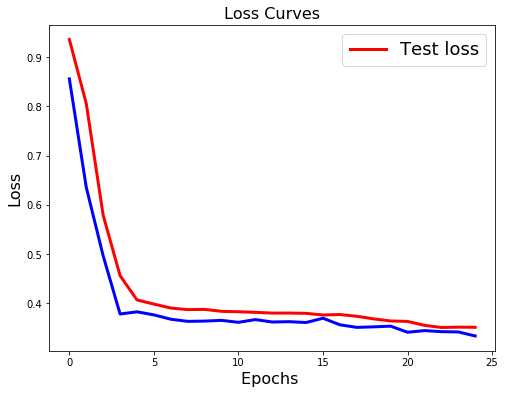

In [36]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(rnn.history['loss'],'r',linewidth=3.0)
plt.plot(rnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.legend(['Test loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [37]:
prediction = model.predict(features)

In [38]:
prediction.shape

(500, 5)

In [39]:
prediction

array([[0.96038824, 0.9428593 , 0.992655  , 0.7558726 , 0.914263  ],
       [1.114787  , 1.1325308 , 1.2144682 , 0.9449893 , 1.1936091 ],
       [1.0364382 , 1.0519979 , 1.1044393 , 0.86880165, 1.0787501 ],
       ...,
       [1.0337043 , 1.1249682 , 1.1323007 , 0.97834134, 1.2323992 ],
       [0.9515622 , 1.096429  , 1.0437796 , 0.9990965 , 1.2424438 ],
       [0.6178086 , 0.6594926 , 0.59207743, 0.5829783 , 0.62788504]],
      dtype=float32)

The process of prediction was done. Now, it's time for creating result data frame. 

In [40]:
result_df = pd.DataFrame(columns = ['ID-Months', 'KG_N'])

In [41]:
predicted_values = []
id_list = []


for consumer_id in range(1000, 1500):
    month_id_list = [0,4,2,1,3]
    for month_id in month_id_list:
        predicted_values.append(prediction[consumer_id-1000][month_id])
        
    month_list = ['2019_Ağustos', '2019_Aralık', '2019_Ekim', '2019_Eylül', '2019_Kasım']
    
    for month_name in month_list:
        id_list.append(str(consumer_id) + '-' + month_name)

In [42]:
result_df['ID-Months'] = id_list
result_df['KG_N'] = predicted_values

In [43]:
result_df.head()

,ID-Months,KG_N
0,1000-2019_Ağustos,0.960388
1,1000-2019_Aralık,0.914263
2,1000-2019_Ekim,0.992655
3,1000-2019_Eylül,0.942859
4,1000-2019_Kasım,0.755873


In [44]:
result_df.tail()

,ID-Months,KG_N
2495,1499-2019_Ağustos,0.617809
2496,1499-2019_Aralık,0.627885
2497,1499-2019_Ekim,0.592077
2498,1499-2019_Eylül,0.659493
2499,1499-2019_Kasım,0.582978


In [45]:
result_df.to_csv('submission.csv', index = False, encoding = 'utf-8-sig')